In [530]:
# Text Mining

In [532]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [534]:
# Read book_ratings.csv
book_ratings = pd.read_csv("book_ratings.csv")

In [536]:
book_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,Got this,Got this book version along with Romeo & Julie...
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,Outstanding Freethought,"Although I've pretty much always been a ""natur..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,A Decent Novel,The first book I read by Mr. Sparks was 'A Wal...
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,Almost identical with excellent on-line material,"This is an excellent reference. However, be aw..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,Stilted prose,"While the subject of the book is fascinating, ..."


In [538]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [540]:
# Lowercasing
book_ratings['review/summary'] = book_ratings['review/summary'].astype(str).str.lower()
book_ratings['review/text'] = book_ratings['review/text'].astype(str).str.lower()



In [542]:
# Tokenization
book_ratings['review/summary'] = book_ratings['review/summary'].apply(word_tokenize)
book_ratings['review/text'] = book_ratings['review/text'].apply(word_tokenize)

In [544]:
# Removing Punctuation
book_ratings['review/summary'] = book_ratings['review/summary'].apply(lambda x: [word for word in x if word.isalnum()])
book_ratings['review/text'] = book_ratings['review/text'].apply(lambda x: [word for word in x if word.isalnum()])

In [546]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))
book_ratings['review/summary'] = book_ratings['review/summary'].apply(lambda x: [word for word in x if word not in stop_words])
book_ratings['review/text'] = book_ratings['review/text'].apply(lambda x: [word for word in x if word not in stop_words])

In [548]:
# Stemming
ps = PorterStemmer()
book_ratings['review/summary'] = book_ratings['review/summary'].apply(lambda x: [ps.stem(word) for word in x])
book_ratings['review/text'] = book_ratings['review/text'].apply(lambda x: [ps.stem(word) for word in x])

In [549]:
# Removing Special Characters and Numbers
book_ratings['review/summary'] = book_ratings['review/summary'].apply(lambda x: [re.sub(r'[^a-zA-Z]', '', str(word)) for word in x])
book_ratings['review/text'] = book_ratings['review/text'].apply(lambda x: [re.sub(r'[^a-zA-Z]', '', str(word)) for word in x])

In [552]:
book_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,[got],"[got, book, version, along, romeo, juliet, pri..."
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,"[outstand, freethought]","[although, pretti, much, alway, natur, atheist..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,"[decent, novel]","[first, book, read, spark, walk, rememb, book,..."
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,"[almost, ident, excel, materi]","[excel, refer, howev, awar, provid, much, read..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,"[stilt, prose]","[subject, book, fascin, interest, inform, book..."


In [554]:
custom_stop_words = {"is", "in", "would", "may", "must", "one", "upon", "might", "shall", "could"}
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(custom_stop_words)

book_ratings['review/summary'] = book_ratings['review/summary'].apply(lambda x: [word for word in x if word not in stop_words])
book_ratings['review/text'] = book_ratings['review/text'].apply(lambda x: [word for word in x if word not in stop_words])


In [556]:
book_ratings.head()


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,[got],"[got, book, version, along, romeo, juliet, pri..."
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,"[outstand, freethought]","[although, pretti, much, alway, natur, atheist..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,"[decent, novel]","[first, book, read, spark, walk, rememb, book,..."
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,"[almost, ident, excel, materi]","[excel, refer, howev, awar, provid, much, read..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,"[stilt, prose]","[subject, book, fascin, interest, inform, book..."


In [558]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [559]:
from wordcloud import WordCloud

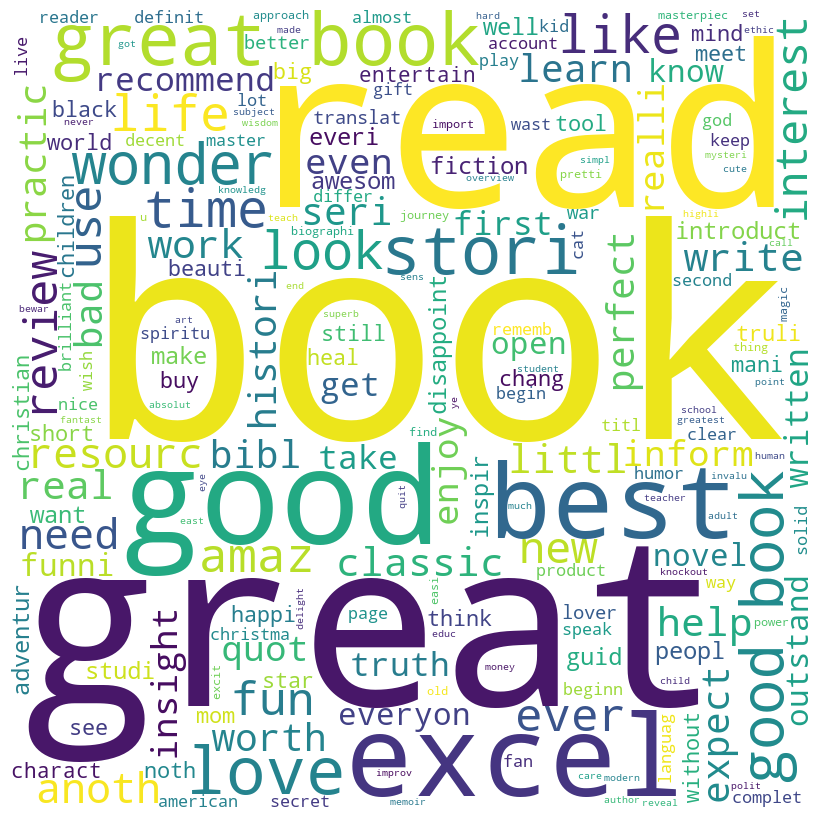

In [560]:
# Create word cloud for review/summary
summary_text = ' '.join(book_ratings['review/summary'].explode().dropna())
wordcloud_summary = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(summary_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

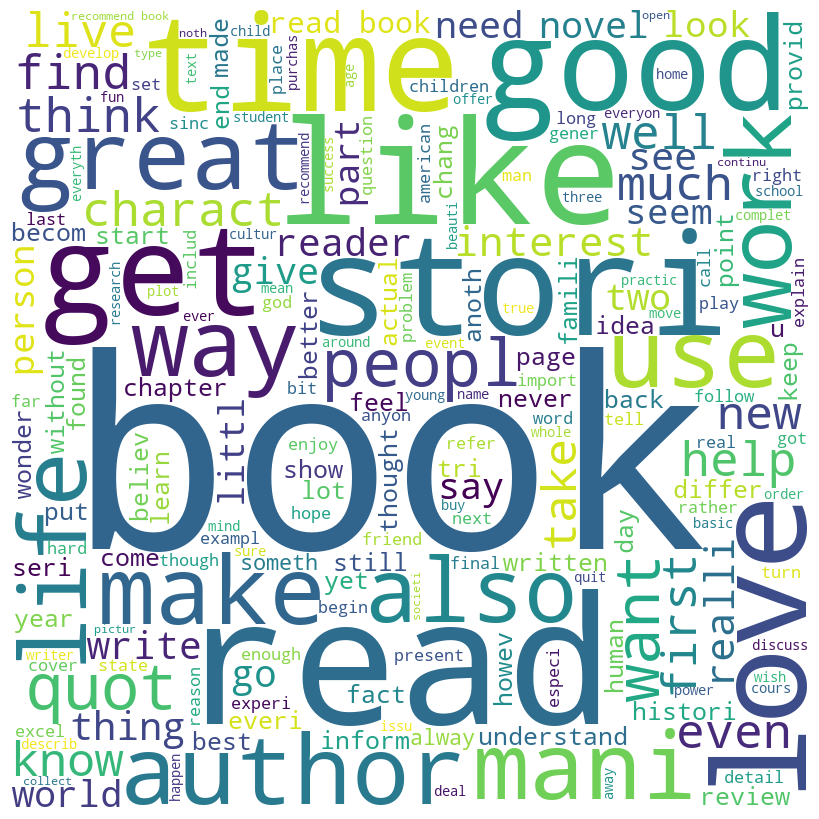

In [561]:
# Create word cloud for review/text
text_text = ' '.join(book_ratings['review/text'].explode().dropna())
wordcloud_text = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(text_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_text)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [565]:
from gensim import corpora, models
import pandas as pd
from nltk.tokenize import word_tokenize

# Read the CSV file
book_ratings = pd.read_csv("book_ratings.csv")

# Create corpus for "review/summary" and "review/text"
corpus_summary = [doc.split() for doc in book_ratings["review/summary"]]
corpus_text = [doc.split() for doc in book_ratings["review/text"]]

# Slice the corpus_summary to return the subset of elements from index 0 to index 5
corpus_summary_subset = corpus_summary[0:5]

# Slice the corpus_text to return the subset of elements from index 0 to index 5
corpus_text_subset = corpus_text[0:5]

# Create dictionary for "review/summary"
summary_dictionary = corpora.Dictionary(corpus_summary)

# Filter out terms that appear in fewer than 2 documents or more than 75% of the documents
summary_dictionary.filter_extremes(no_below=2, no_above=0.75)

# Create dictionary for "review/text"
text_dictionary = corpora.Dictionary(corpus_text)

# Filter out terms that appear in fewer than 2 documents or more than 75% of the documents
text_dictionary.filter_extremes(no_below=2, no_above=0.75)

# Convert "review/summary" corpus into document-term matrix
summary_corpus = [summary_dictionary.doc2bow(tokens) for tokens in corpus_summary_subset]

# Convert "review/text" corpus into document-term matrix
text_corpus = [text_dictionary.doc2bow(tokens) for tokens in corpus_text_subset]


In [568]:
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity

# Compute similarity between documents
# Distance is 1 - similarity
simil_summary = MatrixSimilarity(summary_corpus, num_features=len(summary_dictionary))
distance_summary = 1 - simil_summary[summary_corpus]

simil_text = MatrixSimilarity(text_corpus, num_features=len(text_dictionary))
distance_text = 1 - simil_text[text_corpus]

# Convert similarity matrices to dataframes
summary_sim_df = pd.DataFrame(simil_summary[summary_corpus])
text_sim_df = pd.DataFrame(simil_text[text_corpus])

# Displaying similarity tables
print("Similarity matrix for review/summary:")
print(summary_sim_df)

print("\nSimilarity matrix for review/text:")
print(text_sim_df)

Similarity matrix for review/summary:
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  0.0

Similarity matrix for review/text:
          0         1         2         3         4
0  1.000000  0.125846  0.086427  0.030557  0.113690
1  0.125846  1.000001  0.336782  0.261488  0.436812
2  0.086427  0.336782  1.000001  0.258150  0.286354
3  0.030557  0.261488  0.258150  1.000000  0.269977
4  0.113690  0.436812  0.286354  0.269977  0.999999


In [570]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Read book_ratings.csv
book_ratings = pd.read_csv("book_ratings.csv")

# Remove punctuation from the review/text column
book_ratings["review/text"] = book_ratings["review/text"].str.replace('[^\w\s]', '', regex=True)

# Convert all words to lowercase
book_ratings["review/text"] = book_ratings["review/text"].str.lower()

# Download NLTK stopwords
nltk.download("stopwords")

# Removal of stopwords
stop = stopwords.words("english")
book_ratings["review/text"] = book_ratings["review/text"].apply(lambda x: " ".join(word for word in word_tokenize(x) if word not in stop))

# Stemming
st = PorterStemmer()
book_ratings["review/text"] = book_ratings["review/text"].apply(lambda x: " ".join(st.stem(word) for word in word_tokenize(x)))

# Further remove custom stopwords, which are problem specific
custom_stopwords = ["yet", "do", "side", "along", "there", "two", "la", "can", "get", "who", "use", "like", "that", "be", "much", "instead", "would", "may", "must", "one", "upon", "might", "shall", "could"]
book_ratings["review/text"] = book_ratings["review/text"].apply(lambda x: " ".join(word for word in word_tokenize(x) if word not in custom_stopwords))

print(book_ratings["review/text"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      got book version romeo juliet pride predjudic ...
1      although ive pretti alway natur atheist recent...
2      first book read mr spark walk rememb book draw...
3      excel refer howev awar provid isnt readili ava...
4      subject book fascin interest inform book book ...
                             ...                        
995    ive annoy time past dozen volum gener firstrat...
996    22 friar street exquisit written novel nan dev...
997    actual book ever stop read stori line disjoint...
998    train book son favorit gift know everi bit boo...
999    wish first 2 year nurs schoolal paper apa form...
Name: review/text, Length: 1000, dtype: object


In [571]:
corpus_text = [doc.split() for doc in book_ratings["review/text"]]


In [574]:
# Create dictionary for "review/text"
text_dictionary = corpora.Dictionary(corpus_text)

In [576]:
# Filter out terms that appear in fewer than 2 documents or more than 75% of the documents
text_dictionary.filter_extremes(no_below=2, no_above=0.75)

In [578]:
# Convert "review/text" corpus into document-term matrix
text_corpus = [text_dictionary.doc2bow(tokens) for tokens in corpus_text_subset]


In [580]:
# Create LDA model using gensim library
n_topics = 6
ldamodel = models.LdaModel(text_corpus, num_topics=n_topics, id2word=text_dictionary, passes=40)

# Extract topic-term distributions from the LDA model
topic_term_distributions = ldamodel.show_topics(num_topics=n_topics, num_words=10, formatted=False)

# Display the topic-term distributions as linear combinations
for topic_id, topic in topic_term_distributions:
    print(f"Topic {topic_id + 1}:")
    terms = [term for term, _ in topic]
    weights = [weight for _, weight in topic]
    print(" + ".join([f"{weight:.4f} * {term}" for term, weight in zip(terms, weights)]))
    print("="*50)

Topic 1:
0.0028 * read + 0.0028 * subject + 0.0028 * reader + 0.0028 * love + 0.0028 * worth + 0.0015 * past + 0.0015 * still + 0.0015 * street + 0.0015 * better + 0.0015 * stay
Topic 2:
0.0002 * version + 0.0002 * window + 0.0002 * web + 0.0002 * prefer + 0.0002 * beneath + 0.0002 * drawn + 0.0002 * read + 0.0002 * past + 0.0002 * fall + 0.0002 * share
Topic 3:
0.0015 * drawn + 0.0015 * also + 0.0015 * good + 0.0015 * strength + 0.0015 * recent + 0.0015 * best + 0.0015 * later + 0.0015 * somewhat + 0.0015 * threat + 0.0015 * reason
Topic 4:
0.0002 * version + 0.0002 * beneath + 0.0002 * prefer + 0.0002 * window + 0.0002 * web + 0.0002 * drawn + 0.0002 * read + 0.0002 * past + 0.0002 * fall + 0.0002 * share
Topic 5:
0.0016 * version + 0.0002 * web + 0.0002 * beneath + 0.0002 * prefer + 0.0002 * window + 0.0002 * drawn + 0.0002 * read + 0.0002 * past + 0.0002 * share + 0.0002 * first
Topic 6:
0.0016 * web + 0.0016 * beneath + 0.0016 * prefer + 0.0016 * window + 0.0002 * version + 0.0002